In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
data=pd.read_csv("C:\\Users\\mm\\Desktop\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
data.shape

(7043, 21)

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

C:\Users\mm\AppData\Local\Temp\ipykernel_14304\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

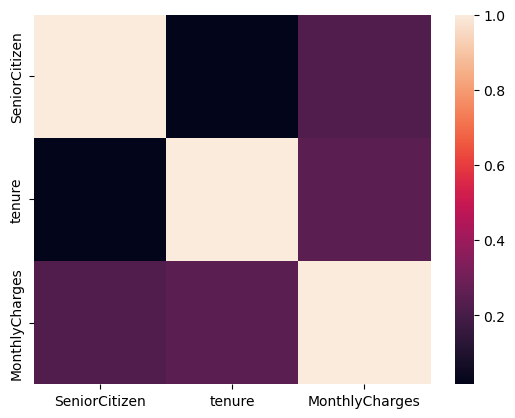

In [7]:
sns.heatmap(data.corr())

<Axes: xlabel='SeniorCitizen', ylabel='count'>

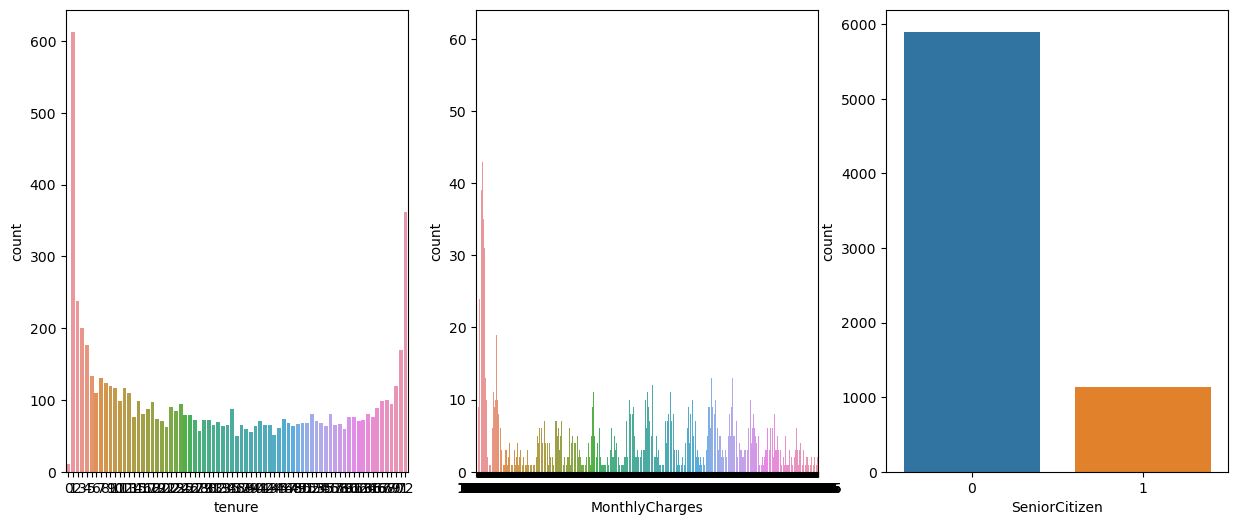

In [8]:
#charts that show all data in one chart
g,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.countplot(x="tenure",data=data,ax=axes[0])
sns.countplot(x="MonthlyCharges",data=data,ax=axes[1])
sns.countplot(x="SeniorCitizen",data=data,ax=axes[2])

<Axes: >

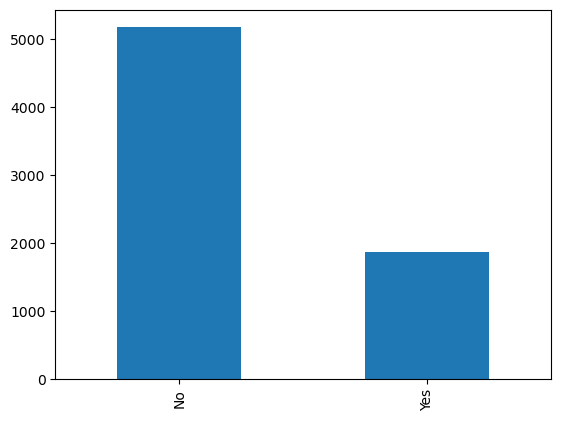

In [9]:
data['Churn'].value_counts().plot(kind="bar")

In [10]:
data['InternetService'].value_counts() 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [11]:
data.pivot_table(index="InternetService",columns="Churn")

C:\Users\mm\AppData\Local\Temp\ipykernel_14304\618805937.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  data.pivot_table(index="InternetService",columns="Churn")


MonthlyCharges            SeniorCitizen               tenure  \
Churn                       No        Yes            No       Yes         No   
InternetService                                                                
DSL                  60.212105  49.083224      0.092253  0.169935  37.198777   
Fiber optic          93.932379  88.126484      0.243469  0.303007  42.089494   
No                   21.136058  20.368142      0.033263  0.044248  32.331210   

                            
Churn                  Yes  
InternetService             
DSL              14.111111  
Fiber optic      20.196608  
No                8.238938

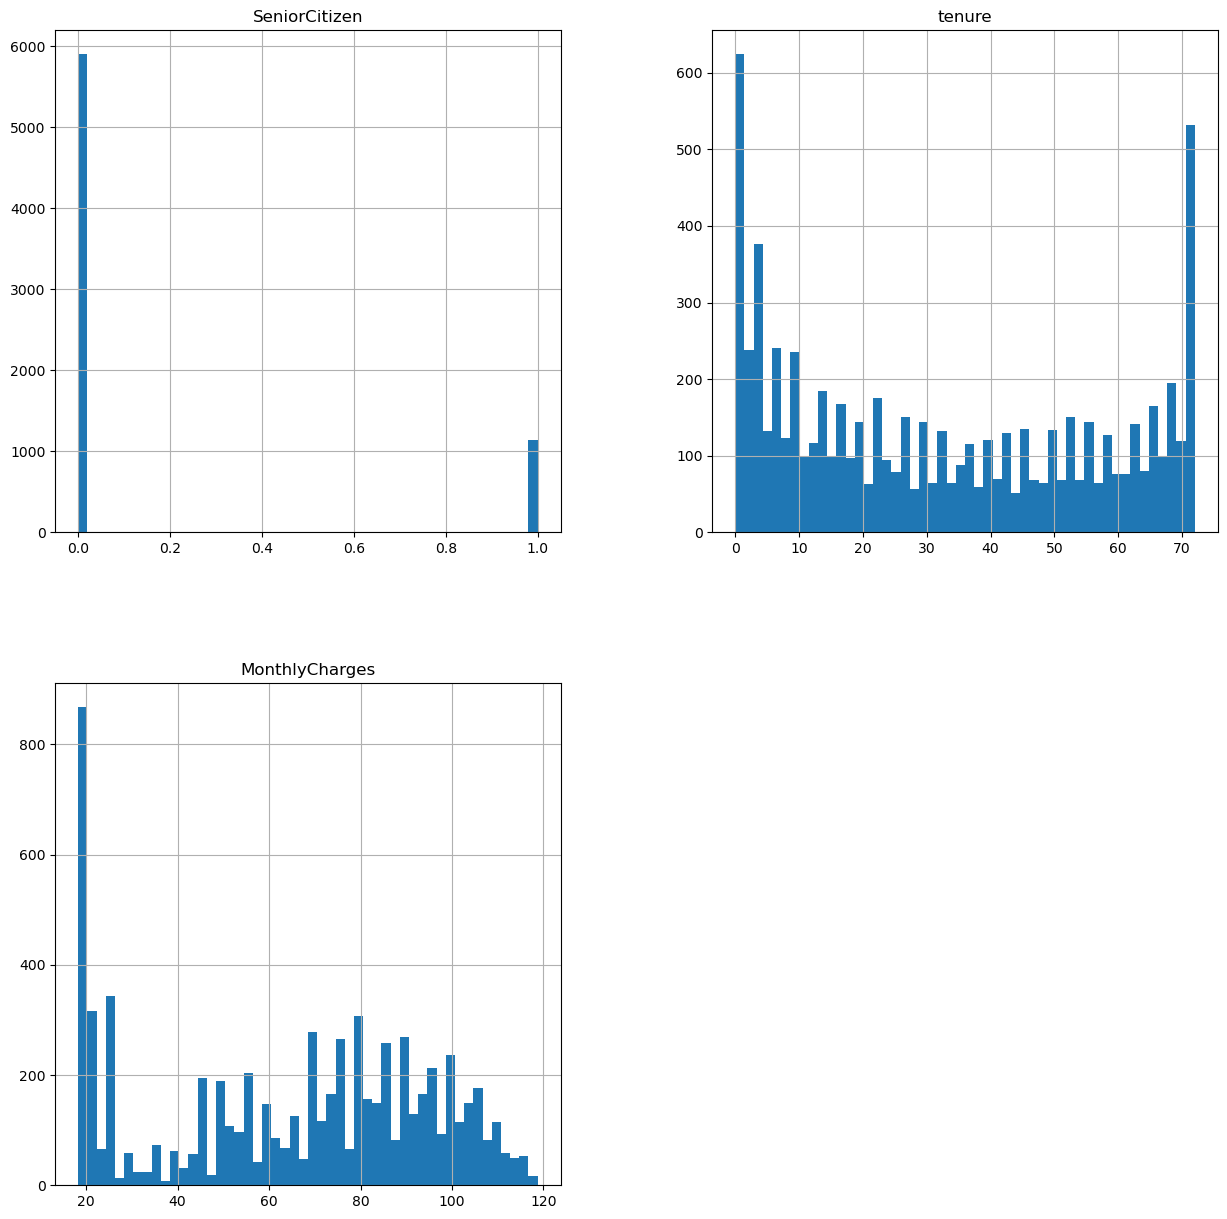

In [23]:
data.hist(bins=50,figsize=(15,15))
plt.show()

In [29]:
training_data=data[["MonthlyCharges","SeniorCitizen","tenure"]]
testing_data=data["Churn"]
x_train,x_test,y_train,y_test=train_test_split(training_data,testing_data,random_state=42,test_size=0.2)

In [36]:
l=LGBMClassifier()
model=l.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [38]:
dt=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model2=dt.fit(x_train,y_train)
y_pred=model2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1036
         Yes       0.63      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



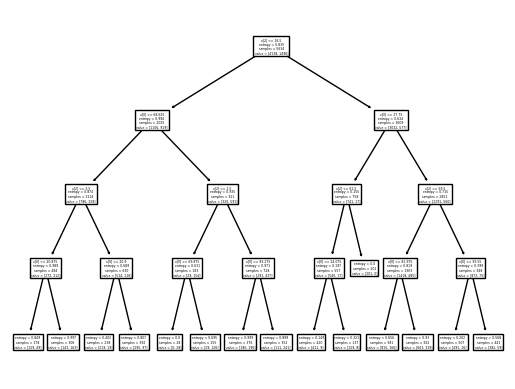

In [41]:
tree.plot_tree(model2)
plt.show()

In [42]:
lr=LogisticRegression()
model3=lr.fit(x_train,y_train)
y_pred=model3.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.69      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



In [43]:
Grad=GradientBoostingClassifier()
model4=Grad.fit(x_train,y_train)
y_pred=model4.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1036
         Yes       0.69      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

